In [35]:
import numpy as np
import os 
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
def extract_threads_key_size(file):
    [threads, keys] = re.findall(r"\d+", file)
    return int(threads), int(keys)

In [60]:
def parse_stats(file):
    with open("perf_out/" + file) as f:
        stats = dict()
        lines = f.readlines()
        stats["cpu_util"]  = float(lines[5].split("#")[1].split("CPU")[0])
        stats["context_switches"] = int(lines[6].split("conte")[0])
        stats["page_faults_total"] = int(lines[8].split("page")[0])
        stats["page_faults_freq"] = float(lines[8].split("#")[1].strip().split(" ")[0]) # needs to be scaled
        stats["stalled_cycles_frontend"] = float(lines[10].split("#")[1].split("%")[0])
        stats["stalled_cycles_backend"] = float(lines[11].split("#")[1].split("%")[0])
        stats["instr_per_cycle"] = float(lines[12].split("#")[1].split("ins")[0])
        stats["stalled_cycles_per_ins"] = float(lines[13].split("#")[1].split("stalled")[0])
        stats["branches_total"] = int(lines[14].split("branches")[0])
        stats["branches_freq"]  = float(lines[14].split("#")[1].split("M")[0])
        stats["branch_misses_perc"] = float(lines[15].split("#")[1].split("%")[0])
        return stats

In [57]:
os.listdir("perf_out")

['perf_read_31threads_32keys.data',
 'perf_stat_read_1threads_16keys.txt',
 'perf_write_6threads_16keys.data',
 'perf_read_19threads_16keys.data',
 'perf_read_4threads_32keys.data',
 'perf_stat_read_19threads_16keys.txt',
 'perf-dbbench_read_numa_32threads_32keys.svg',
 'write_20threads_8keys.time',
 'read_numa_2threads_8keys.time',
 'perf-dbbench_write_26threads_16keys.svg',
 'perf_read_numa_11threads_8keys.data',
 'perf-dbbench_read_12threads_32keys.svg',
 'perf-dbbench_read_32threads_8keys.svg',
 'perf-dbbench_read_20threads_16keys.svg',
 'perf_read_numa_12threads_32keys.data',
 'read_numa_11threads_16keys.time',
 'perf_read_9threads_32keys.data',
 'perf_write_10threads_32keys.data',
 'perf-dbbench_write_14threads_32keys.svg',
 'perf_read_numa_3threads_16keys.data',
 'perf_read_14threads_16keys.data',
 'perf_stat_read_numa_19threads_32keys.txt',
 'read_20threads_8keys.time',
 'write_12threads_32keys.time',
 'perf_stat_read_numa_31threads_32keys.txt',
 'perf-dbbench_read_numa_3thread

In [61]:
stats = {
    "read": {
        8: {},
        16: {},
        32: {}
    },
    "write": {
        8: {},
        16: {},
        32: {}
    },
}

for file in os.listdir("perf_out"):
    if file.startswith("perf_stat_read_numa"):
        continue
    if file.startswith("perf_stat_read"):
        threads, keys = extract_threads_key_size("perf_out/" + file)
        stats["read"][keys][threads] = parse_stats(file)
    if file.startswith("perf_stat_write"):
        threads, keys = extract_threads_key_size("perf_out/" + file)
        stats["write"][keys][threads] = parse_stats(file)

In [62]:
stats

{'read': {8: {21: {'cpu_util': 12.435,
    'context_switches': 3096,
    'page_faults_total': 3230,
    'page_faults_freq': 0.4,
    'stalled_cycles_frontend': 15.86,
    'stalled_cycles_backend': 26.36,
    'instr_per_cycle': 0.67,
    'stalled_cycles_per_ins': 0.39,
    'branches_total': 1348665433,
    'branches_freq': 166.933,
    'branch_misses_perc': 1.78},
   14: {'cpu_util': 3.842,
    'context_switches': 2615,
    'page_faults_total': 27912,
    'page_faults_freq': 0.003,
    'stalled_cycles_frontend': 14.94,
    'stalled_cycles_backend': 44.57,
    'instr_per_cycle': 0.74,
    'stalled_cycles_per_ins': 0.6,
    'branches_total': 2385240837,
    'branches_freq': 280.004,
    'branch_misses_perc': 1.86},
   4: {'cpu_util': 3.179,
    'context_switches': 432,
    'page_faults_total': 34316,
    'page_faults_freq': 0.001,
    'stalled_cycles_frontend': 27.58,
    'stalled_cycles_backend': 32.84,
    'instr_per_cycle': 0.69,
    'stalled_cycles_per_ins': 0.47,
    'branches_total'

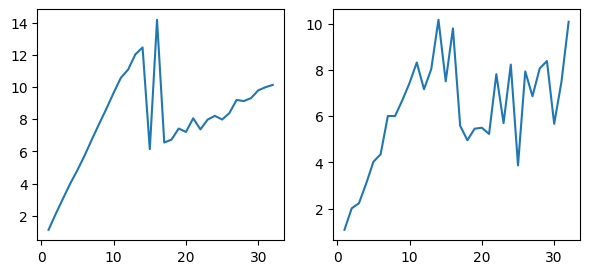

In [70]:
read_cpu_util16 = [stats["read"][16][x]["cpu_util"] for x in range(1,33)]
write_cpu_util16 = [stats["write"][16][x]["cpu_util"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_cpu_util16)
axs[1].plot(list(range(1,33)), read_cpu_util16)

plt.tight_layout()

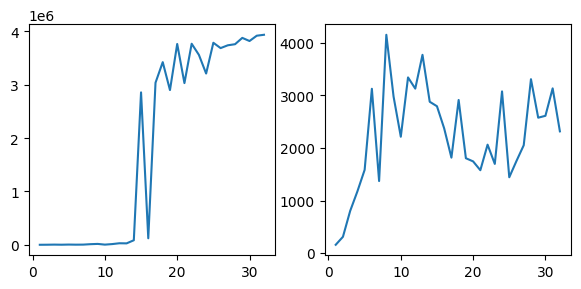

In [71]:
read_context_switches16 = [stats["read"][16][x]["context_switches"] for x in range(1,33)]
write_context_switches16 = [stats["write"][16][x]["context_switches"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_context_switches16)
axs[1].plot(list(range(1,33)), read_context_switches16)

plt.tight_layout()

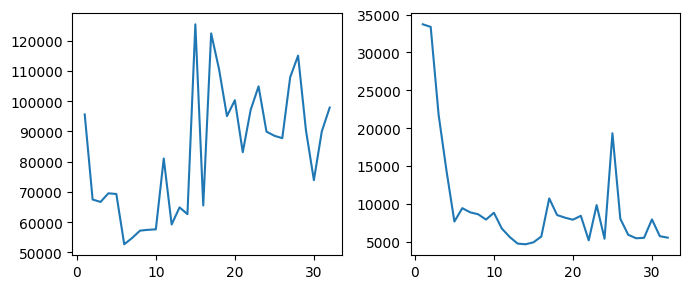

In [73]:
read_page_faults_total16 = [stats["read"][16][x]["page_faults_total"] for x in range(1,33)]
write_page_faults_total16 = [stats["write"][16][x]["page_faults_total"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_page_faults_total16)
axs[1].plot(list(range(1,33)), read_page_faults_total16)

plt.tight_layout()

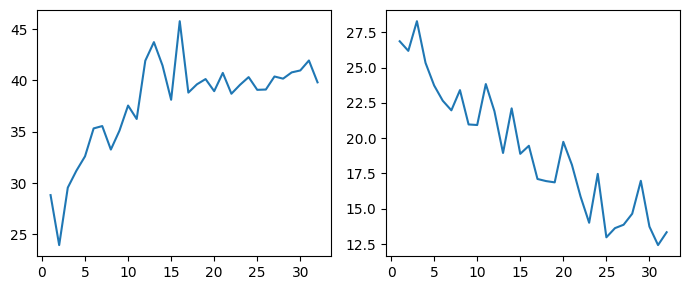

In [74]:
read_stalled_cycles_frontend16 = [stats["read"][16][x]["stalled_cycles_frontend"] for x in range(1,33)]
write_stalled_cycles_frontend16 = [stats["write"][16][x]["stalled_cycles_frontend"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_stalled_cycles_frontend16)
axs[1].plot(list(range(1,33)), read_stalled_cycles_frontend16)

plt.tight_layout()

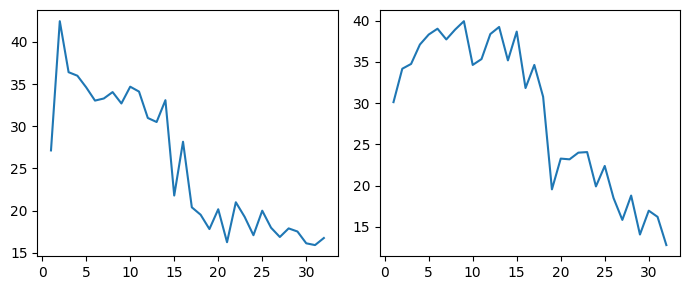

In [75]:
read_stalled_cycles_backend16 = [stats["read"][16][x]["stalled_cycles_backend"] for x in range(1,33)]
write_stalled_cycles_backend16 = [stats["write"][16][x]["stalled_cycles_backend"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_stalled_cycles_backend16)
axs[1].plot(list(range(1,33)), read_stalled_cycles_backend16)

plt.tight_layout()

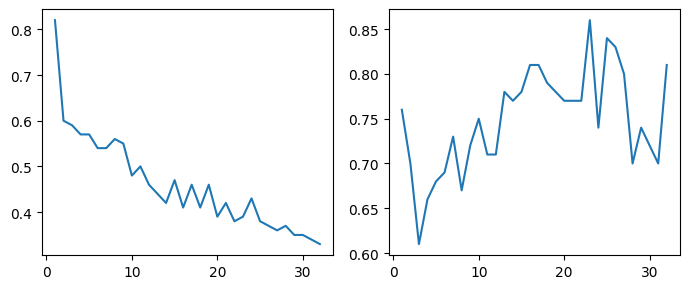

In [76]:
read_instr_per_cycle16 = [stats["read"][16][x]["instr_per_cycle"] for x in range(1,33)]
write_instr_per_cycle16 = [stats["write"][16][x]["instr_per_cycle"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_instr_per_cycle16)
axs[1].plot(list(range(1,33)), read_instr_per_cycle16)

plt.tight_layout()

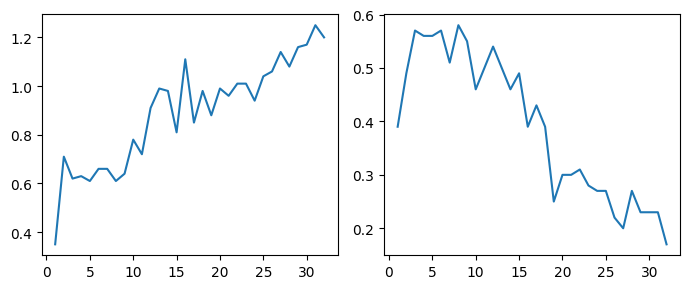

In [77]:
read_stalled_cycles_per_ins16 = [stats["read"][16][x]["stalled_cycles_per_ins"] for x in range(1,33)]
write_stalled_cycles_per_ins16 = [stats["write"][16][x]["stalled_cycles_per_ins"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_stalled_cycles_per_ins16)
axs[1].plot(list(range(1,33)), read_stalled_cycles_per_ins16)

plt.tight_layout()

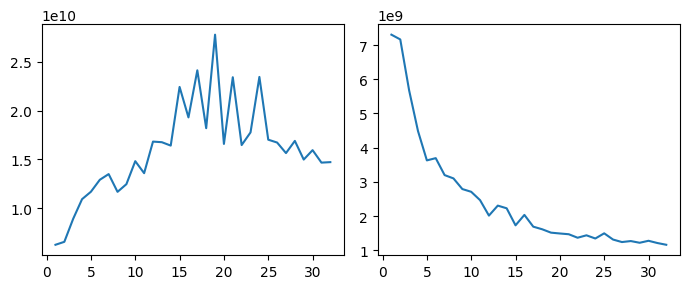

In [78]:
read_branches_total16 = [stats["read"][16][x]["branches_total"] for x in range(1,33)]
write_branches_total16 = [stats["write"][16][x]["branches_total"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_branches_total16)
axs[1].plot(list(range(1,33)), read_branches_total16)

plt.tight_layout()

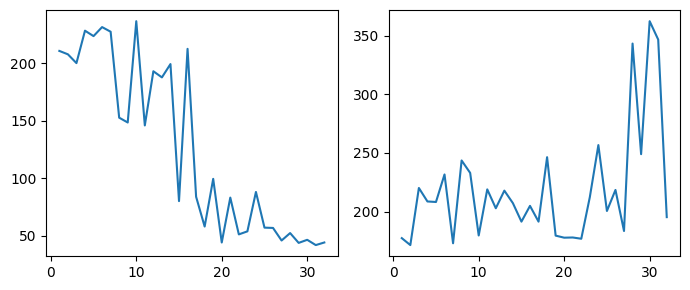

In [79]:
read_branches_freq16 = [stats["read"][16][x]["branches_freq"] for x in range(1,33)]
write_branches_freq16 = [stats["write"][16][x]["branches_freq"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_branches_freq16)
axs[1].plot(list(range(1,33)), read_branches_freq16)

plt.tight_layout()

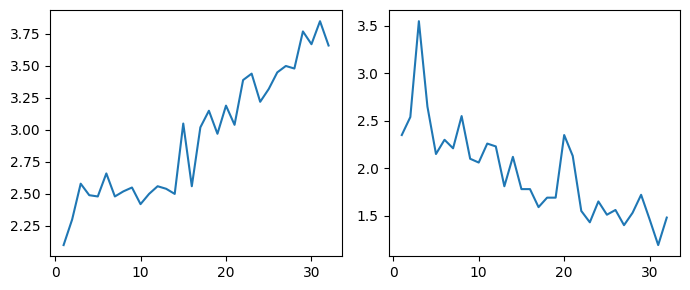

In [80]:
read_branch_misses_perc16 = [stats["read"][16][x]["branch_misses_perc"] for x in range(1,33)]
write_branch_misses_perc16 = [stats["write"][16][x]["branch_misses_perc"] for x in range(1,33)]

fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].plot(list(range(1,33)), write_branch_misses_perc16)
axs[1].plot(list(range(1,33)), read_branch_misses_perc16)

plt.tight_layout()

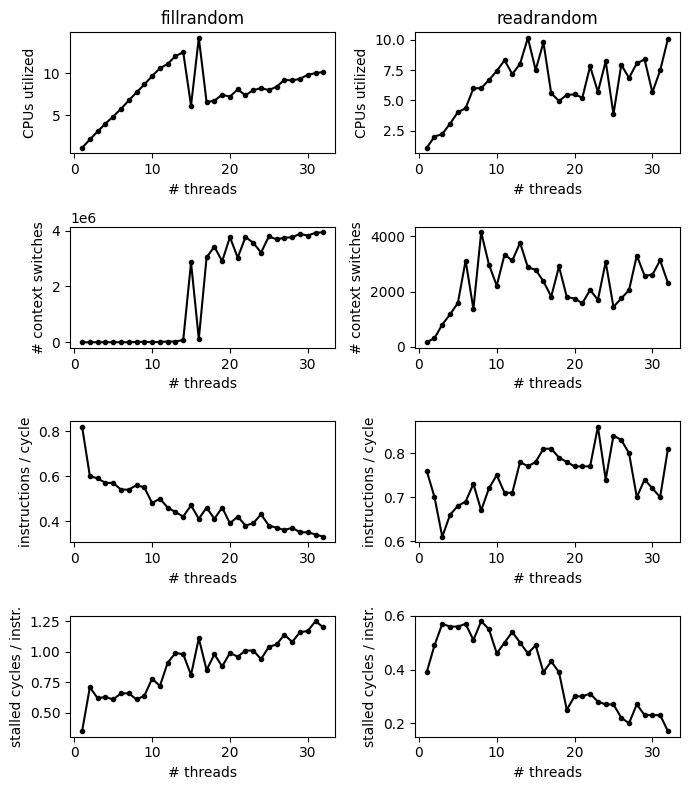

In [113]:
fig, axs = plt.subplots(4,2,figsize=(7,8))

axs[0,0].plot(list(range(1,33)), write_cpu_util16, c="black", marker=".")
axs[0,1].plot(list(range(1,33)), read_cpu_util16, c="black", marker=".")

axs[0,0].set_ylabel("CPUs utilized")
axs[0,1].set_ylabel("CPUs utilized")

axs[0,0].set_title("fillrandom")
axs[0,1].set_title("readrandom")

axs[1,0].plot(list(range(1,33)), write_context_switches16, c="black", marker=".")
axs[1,1].plot(list(range(1,33)), read_context_switches16, c="black", marker=".")

axs[1,0].set_ylabel("# context switches")
axs[1,1].set_ylabel("# context switches")

axs[2,0].plot(list(range(1,33)), write_instr_per_cycle16, c="black", marker=".")
axs[2,1].plot(list(range(1,33)), read_instr_per_cycle16, c="black", marker=".")

axs[2,0].set_ylabel("instructions / cycle")
axs[2,1].set_ylabel("instructions / cycle")

axs[3,0].plot(list(range(1,33)), write_stalled_cycles_per_ins16, c="black", marker=".")
axs[3,1].plot(list(range(1,33)), read_stalled_cycles_per_ins16, c="black", marker=".")

axs[3,0].set_ylabel("stalled cycles / instr.")
axs[3,1].set_ylabel("stalled cycles / instr.")

for i in range(4):
    for j in range(2):
        axs[i,j].set_xlabel("# threads")

plt.tight_layout()

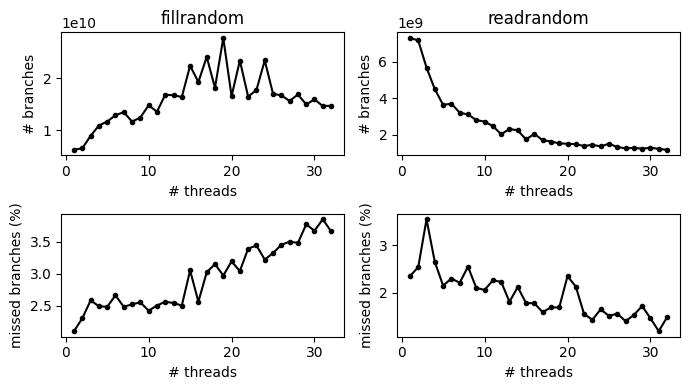

In [111]:
fig, axs = plt.subplots(2,2,figsize=(7,4))

axs[0,0].plot(list(range(1,33)), write_branches_total16, c="black", marker=".")
axs[0,1].plot(list(range(1,33)), read_branches_total16, c="black", marker=".")

axs[0,0].set_ylabel("# branches")
axs[0,1].set_ylabel("# branches")

axs[0,0].set_title("fillrandom")
axs[0,1].set_title("readrandom")

axs[1,0].plot(list(range(1,33)), write_branch_misses_perc16, c="black", marker=".")
axs[1,1].plot(list(range(1,33)), read_branch_misses_perc16, c="black", marker=".")

axs[1,0].set_ylabel("missed branches (%)")
axs[1,1].set_ylabel("missed branches (%)")

for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel("# threads")

plt.tight_layout()